In [1]:
pwd

u'C:\\Users\\hp\\Downloads\\python\\3. CREDIT CARD SPEND PREDICTION PROBLEM- BANKING-REGRESSION\\3. CREDIT CARD SPEND PREDICTION PROBLEM- BANKING-REGRESSION'

In [2]:
import pandas as pd
import numpy as np
import pandas_profiling

In [243]:
credit=pd.read_csv('C:\Users\hp\Downloads\python\CREDIT CARD USERS DATA.csv')

In [244]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 132 entries, custid to response_03
dtypes: float64(16), int64(99), object(17)
memory usage: 5.0+ MB


In [245]:
credit.dtypes

custid          object
region           int64
townsize        object
gender           int64
age              int64
agecat           int64
birthmonth      object
ed               int64
edcat            int64
jobcat           int64
union            int64
employ           int64
empcat           int64
retire           int64
income           int64
lninc          float64
inccat           int64
debtinc        float64
creddebt       float64
lncreddebt      object
othdebt        float64
lnothdebt       object
default          int64
jobsat           int64
marital          int64
spoused          int64
spousedcat       int64
reside           int64
pets             int64
pets_cats        int64
                ...   
cardten         object
lncardten       object
wireless         int64
wiremon        float64
lnwiremon       object
wireten        float64
lnwireten       object
multline         int64
voice            int64
pager            int64
internet         int64
callid           int64
callwait   

In [246]:
credit.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [247]:
credit.isnull().sum()

custid         0
region         0
townsize       0
gender         0
age            0
agecat         0
birthmonth     0
ed             0
edcat          0
jobcat         0
union          0
employ         0
empcat         0
retire         0
income         0
lninc          0
inccat         0
debtinc        0
creddebt       0
lncreddebt     0
othdebt        0
lnothdebt      0
default        0
jobsat         0
marital        0
spoused        0
spousedcat     0
reside         0
pets           0
pets_cats      0
              ..
cardten        0
lncardten      0
wireless       0
wiremon        0
lnwiremon      0
wireten        0
lnwireten      0
multline       0
voice          0
pager          0
internet       0
callid         0
callwait       0
forward        0
confer         0
ebill          0
owntv          0
hourstv        0
ownvcr         0
owndvd         0
owncd          0
ownpda         0
ownpc          0
ownipod        0
owngame        0
ownfax         0
news           0
response_01   

In [248]:
#Checking significance of variables

In [77]:
credit.get_dtype_counts()

float64    16
int64      99
object     17
dtype: int64

In [261]:
credit_obj=credit.select_dtypes(include=['object'])
credit_obj.columns

Index([u'custid', u'townsize', u'birthmonth', u'lncreddebt', u'lnothdebt',
       u'commutetime', u'longten', u'lnlongten', u'lntollmon', u'lntollten',
       u'lnequipmon', u'lnequipten', u'lncardmon', u'cardten', u'lncardten',
       u'lnwiremon', u'lnwireten'],
      dtype='object')

In [41]:
pandas_profiling.ProfileReport(credit)

Number of variables,125
Number of observations,5000
Total Missing (%),0.0%
Total size in memory,4.8 MiB
Average record size in memory,1000.0 B
Numeric,55
Categorical,3
Boolean,49
Date,0
Text (Unique),1
Rejected,12


In [250]:
credit_float=credit.select_dtypes(include=['float64'])
credit_float.columns

Index([u'lninc', u'debtinc', u'creddebt', u'othdebt', u'carvalue',
       u'cardspent', u'card2spent', u'longmon', u'lnlongmon', u'tollmon',
       u'tollten', u'equipmon', u'equipten', u'cardmon', u'wiremon',
       u'wireten'],
      dtype='object')

In [251]:
credit_float[credit_float=='#NULL!'].count()

lninc         0
debtinc       0
creddebt      0
othdebt       0
carvalue      0
cardspent     0
card2spent    0
longmon       0
lnlongmon     0
tollmon       0
tollten       0
equipmon      0
equipten      0
cardmon       0
wiremon       0
wireten       0
dtype: int64

In [252]:
credit_obj[credit_obj=='#NULL!'].count()

custid            0
townsize          2
birthmonth        0
lncreddebt        1
lnothdebt         1
commutetime       2
longten           3
lnlongten         3
lntollmon      2622
lntollten      2622
lnequipmon     3296
lnequipten     3296
lncardmon      1419
cardten           2
lncardten      1422
lnwiremon      3656
lnwireten      3656
dtype: int64

In [253]:
credit_int=credit.select_dtypes(include=['int64'])
credit_int.columns

Index([u'region', u'gender', u'age', u'agecat', u'ed', u'edcat', u'jobcat',
       u'union', u'employ', u'empcat', u'retire', u'income', u'inccat',
       u'default', u'jobsat', u'marital', u'spoused', u'spousedcat', u'reside',
       u'pets', u'pets_cats', u'pets_dogs', u'pets_birds', u'pets_reptiles',
       u'pets_small', u'pets_saltfish', u'pets_freshfish', u'homeown',
       u'hometype', u'address', u'addresscat', u'cars', u'carown', u'cartype',
       u'carcatvalue', u'carbought', u'carbuy', u'commute', u'commutecat',
       u'commutecar', u'commutemotorcycle', u'commutecarpool', u'commutebus',
       u'commuterail', u'commutepublic', u'commutebike', u'commutewalk',
       u'commutenonmotor', u'telecommute', u'reason', u'polview', u'polparty',
       u'polcontrib', u'vote', u'card', u'cardtype', u'cardbenefit',
       u'cardfee', u'cardtenure', u'cardtenurecat', u'card2', u'card2type',
       u'card2benefit', u'card2fee', u'card2tenure', u'card2tenurecat',
       u'carditems', u'

In [254]:
creditif=pd.concat([credit_int,credit_float],axis=1)

In [69]:
credit_int.corr()

,region,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
region,1.000000,-0.012810,-0.026525,-0.018455,0.013173,0.015710,-0.004717,-0.013768,-0.011036,-0.009345,...,0.048589,0.040228,0.020596,0.007504,0.026391,0.036622,0.012312,-0.013004,0.005899,0.005694
gender,-0.012810,1.000000,-0.010186,-0.007427,-0.000643,-0.002673,-0.016470,0.000311,-0.010946,-0.013842,...,-0.002861,-0.001116,-0.006963,-0.021319,0.001164,0.009167,-0.020837,0.018058,0.001385,-0.009685
age,-0.026525,-0.010186,1.000000,0.969879,-0.094560,-0.081129,0.037709,0.011206,0.703053,0.739573,...,0.055100,-0.074423,-0.133284,-0.217524,-0.235226,-0.042090,0.365204,0.015140,0.013175,-0.026231
agecat,-0.018455,-0.007427,0.969879,1.000000,-0.079021,-0.064124,0.032554,0.004465,0.676722,0.732246,...,0.078888,-0.059490,-0.123192,-0.208690,-0.223387,-0.029310,0.348275,0.010039,0.010467,-0.014860
ed,0.013173,-0.000643,-0.094560,-0.079021,1.000000,0.963896,-0.072297,0.000594,-0.215374,-0.197884,...,0.053189,0.299871,0.435034,0.369256,0.376235,0.276750,-0.073644,-0.117606,0.073207,0.107171
edcat,0.015710,-0.002673,-0.081129,-0.064124,0.963896,1.000000,-0.069002,-0.003240,-0.200419,-0.185672,...,0.056563,0.293125,0.414619,0.357481,0.361191,0.273646,-0.068420,-0.112653,0.070172,0.106223
jobcat,-0.004717,-0.016470,0.037709,0.032554,-0.072297,-0.069002,1.000000,0.084778,0.416472,0.346723,...,0.022038,-0.009352,-0.037929,-0.026888,-0.050278,0.008409,0.090861,0.000137,0.002888,-0.008415
union,-0.013768,0.000311,0.011206,0.004465,0.000594,-0.003240,0.084778,1.000000,0.034846,0.028028,...,0.006251,0.019565,0.006489,-0.005895,0.006765,0.024516,0.007508,-0.010492,0.006431,0.004479
employ,-0.011036,-0.010946,0.703053,0.676722,-0.215374,-0.200419,0.416472,0.034846,1.000000,0.898162,...,0.106874,-0.070408,-0.161337,-0.198110,-0.218399,-0.040181,0.367161,0.040096,0.014430,-0.028480
empcat,-0.009345,-0.013842,0.739573,0.732246,-0.197884,-0.185672,0.346723,0.028028,0.898162,1.000000,...,0.138173,-0.054010,-0.152394,-0.192716,-0.211118,-0.035826,0.369206,0.030418,0.017504,-0.032850


In [274]:
credit_obj[credit_obj=='#NULL!'].count()

lncreddebt     0
lnothdebt      0
commutetime    0
longten        0
lnlongten      0
cardten        0
dtype: int64

In [163]:
credit_obj.isnull().sum()

lncreddebt     0
lnothdebt      0
commutetime    0
longten        0
lnlongten      0
cardten        0
dtype: int64

In [268]:
credit_obj.drop(credit_obj[credit_obj.longten=='#NULL!'].index, inplace=True)

In [275]:
credit_obj = credit_obj.apply(pd.to_numeric)

In [276]:
credit_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 4999
Data columns (total 6 columns):
lncreddebt     4994 non-null float64
lnothdebt      4994 non-null float64
commutetime    4994 non-null int64
longten        4994 non-null float64
lnlongten      4994 non-null float64
cardten        4994 non-null float64
dtypes: float64(5), int64(1)
memory usage: 273.1 KB


In [264]:
credit_obj.drop(columns=['lntollmon','lntollten','lnequipmon','lnequipten','lncardmon','lncardten','lnwiremon','lnwireten'],inplace=True)

In [ ]:
#Drop custid due to high cardinality
#Drop townsize due to high anova P-vaue
#Drop birthmonth due to high anova P-vaue
#Drop region due to high anova p value
#drop employ as it is not highly correlated with Total Spent
#drop address as it is not highly correlated

In [273]:
#credit_obj.drop(columns=['custid'],inplace=True)
#credit_obj.drop(columns=['townsize'],inplace=True)
#credit_obj.drop(columns=['birthmonth'],inplace=True)
#credit.drop(columns=['region'],inplace=True)
#credit.drop(columns=['employ'],inplace=True)
#credit.drop(columns=['address'],inplace=True)

In [277]:
creditif.columns

Index([u'region', u'gender', u'age', u'agecat', u'ed', u'edcat', u'jobcat',
       u'union', u'employ', u'empcat',
       ...
       u'card2spent', u'longmon', u'lnlongmon', u'tollmon', u'tollten',
       u'equipmon', u'equipten', u'cardmon', u'wiremon', u'wireten'],
      dtype='object', length=115)

In [278]:
creditif=pd.concat([creditif,credit_obj],axis=1)

In [279]:
creditif['Total_Spent']=creditif['cardspent']+creditif['card2spent']

In [280]:
for col in creditif.columns:
    if (creditif['Total_Spent'].corr(creditif[col])>-0.09) and (creditif['Total_Spent'].corr(creditif[col])<0.09):
        creditif.drop(columns=[col],inplace=True)
    

In [281]:
for col in creditif.columns:
    print col +" "+ str(creditif['Total_Spent'].corr(creditif[col]))
    

ed 0.09823716695023114
edcat 0.09713436616950138
empcat 0.11131534523796308
retire -0.16126265898255948
income 0.37273110098993767
inccat 0.3733657762804708
addresscat 0.09477243942550054
carcatvalue 0.2069378682992069
card -0.2433040017676753
carditems 0.39193616037088735
card2items 0.4037396477821811
ownvcr 0.12789062971528853
owndvd 0.13196151298706182
owncd 0.11581039269118082
lninc 0.38888865816394186
creddebt 0.2651152863246266
othdebt 0.29255374215297875
carvalue 0.31702698354600434
cardspent 0.9414917415133172
card2spent 0.8252438734152422
tollten 0.10005347256205888
wireten 0.09794284346717652
lncreddebt 0.2452988285506846
lnothdebt 0.26131751022210487
Total_Spent 1.0


In [292]:
creditif.columns

Index([u'ed', u'edcat', u'empcat', u'retire', u'income', u'inccat',
       u'addresscat', u'carcatvalue', u'card', u'carditems', u'card2items',
       u'ownvcr', u'owndvd', u'owncd', u'lninc', u'creddebt', u'othdebt',
       u'carvalue', u'cardspent', u'card2spent', u'tollten', u'wireten',
       u'lncreddebt', u'lnothdebt', u'Total_Spent'],
      dtype='object')

In [40]:
import scipy.stats as stats

In [13]:
s1 = credit.Total_Spent[credit.region==1]
s2 = credit.Total_Spent[credit.region==2]
s3 = credit.Total_Spent[credit.region==3]
s4 = credit.Total_Spent[credit.region==4]
s5 = credit.Total_Spent[credit.region==5]
#s5 = credit.Total_Spent[credit.card==5]
#s6 = credit.Total_Spent[credit.polview==6]
#s7 = credit.Total_Spent[credit.polview==7]
#s8 = credit.Total_Spent[credit.commute==8]
#s9 = credit.Total_Spent[credit.commute==9]
#s10 = credit.Total_Spent[credit.commute==10]


# Perform the ANOVA
stats.f_oneway(s1,s2,s3,s4,s5)

F_onewayResult(statistic=2.6194997714464123, pvalue=0.03322502935703053)

In [15]:
s1 = credit.Total_Spent[credit.townsize==1]
s2 = credit.Total_Spent[credit.townsize==2]
s3 = credit.Total_Spent[credit.townsize==3]
s4 = credit.Total_Spent[credit.townsize==4]
s5 = credit.Total_Spent[credit.townsize==5]
stats.f_oneway(s1,s2,s3,s4,s5)

F_onewayResult(statistic=1.1811686366739043, pvalue=0.31752622179192824)

In [16]:
s1 = credit.Total_Spent[credit.internet==0]
s2 = credit.Total_Spent[credit.internet==1]
s3 = credit.Total_Spent[credit.internet==2]
s4 = credit.Total_Spent[credit.internet==3]
s5 = credit.Total_Spent[credit.internet==4]
stats.f_oneway(s1,s2,s3,s4,s5)

F_onewayResult(statistic=7.765916178215448, pvalue=3.0994941743657175e-06)

In [46]:
s1 = credit.Total_Spent[credit.birthmonth=='January']
s2 = credit.Total_Spent[credit.birthmonth=='February']
s3 = credit.Total_Spent[credit.birthmonth=='March']
s4 = credit.Total_Spent[credit.birthmonth=='April']
s5 = credit.Total_Spent[credit.birthmonth=='May']
s6 = credit.Total_Spent[credit.birthmonth=='June']
s7 = credit.Total_Spent[credit.birthmonth=='July']
s8 = credit.Total_Spent[credit.birthmonth=='August']
s9 = credit.Total_Spent[credit.birthmonth=='September']
s10 = credit.Total_Spent[credit.birthmonth=='October']
s11 = credit.Total_Spent[credit.birthmonth=='November']
s12 = credit.Total_Spent[credit.birthmonth=='December']
stats.f_oneway(s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12)

F_onewayResult(statistic=0.30752091151749245, pvalue=0.9846047749699802)

In [51]:
#s1 = credit.Total_Spent[credit.agecat==1]
s2 = credit.Total_Spent[credit.agecat==2]
s3 = credit.Total_Spent[credit.agecat==3]
s4 = credit.Total_Spent[credit.agecat==4]
s5 = credit.Total_Spent[credit.agecat==5]
s6 = credit.Total_Spent[credit.agecat==6]
#s7 = credit.Total_Spent[credit.agecat==9]

stats.f_oneway(s2,s3,s4,s5,s6)
# This implies agecat is significant

F_onewayResult(statistic=34.96292651080653, pvalue=7.725589990021682e-29)

In [52]:
s1 = credit.Total_Spent[credit.edcat==1]
s2 = credit.Total_Spent[credit.edcat==2]
s3 = credit.Total_Spent[credit.edcat==3]
s4 = credit.Total_Spent[credit.edcat==4]
s5 = credit.Total_Spent[credit.edcat==5]
stats.f_oneway(s1,s2,s3,s4,s5)
#edcat is significant

F_onewayResult(statistic=12.123515638046293, pvalue=8.291211570207953e-10)

In [53]:
s1 = credit.Total_Spent[credit.jobcat==1]
s2 = credit.Total_Spent[credit.jobcat==2]
s3 = credit.Total_Spent[credit.jobcat==3]
s4 = credit.Total_Spent[credit.jobcat==4]
s5 = credit.Total_Spent[credit.jobcat==5]
s6 = credit.Total_Spent[credit.jobcat==6]

stats.f_oneway(s1,s2,s3,s4,s5,s6)
#jobcat is significant

F_onewayResult(statistic=7.448418121410923, pvalue=5.67966754408382e-07)

In [54]:
s0 = credit.Total_Spent[credit.employ==0]
s1 = credit.Total_Spent[credit.employ==1]
s2 = credit.Total_Spent[credit.employ==2]
s3 = credit.Total_Spent[credit.employ==3]
s4 = credit.Total_Spent[credit.employ==4]
s5 = credit.Total_Spent[credit.employ==5]
s6 = credit.Total_Spent[credit.employ==6]
s7 = credit.Total_Spent[credit.employ==7]
s8 = credit.Total_Spent[credit.employ==8]
s9 = credit.Total_Spent[credit.employ==9]
s10 = credit.Total_Spent[credit.employ==10]
s11 = credit.Total_Spent[credit.employ==11]
s12 = credit.Total_Spent[credit.employ==12]
s13 = credit.Total_Spent[credit.employ==13]
s14 = credit.Total_Spent[credit.employ==14]
s15 = credit.Total_Spent[credit.employ==15]
s16 = credit.Total_Spent[credit.employ==16]
s17 = credit.Total_Spent[credit.employ==17]
s18 = credit.Total_Spent[credit.employ==18]
s19 = credit.Total_Spent[credit.employ==19]
s20 = credit.Total_Spent[credit.employ==20]
s21 = credit.Total_Spent[credit.employ==21]
s22 = credit.Total_Spent[credit.employ==22]
s23 = credit.Total_Spent[credit.employ==23]
s24 = credit.Total_Spent[credit.employ==24]
s25 = credit.Total_Spent[credit.employ==25]
s26 = credit.Total_Spent[credit.employ==26]
s27 = credit.Total_Spent[credit.employ==27]
s28 = credit.Total_Spent[credit.employ==28]
s29 = credit.Total_Spent[credit.employ==29]
s30 = credit.Total_Spent[credit.employ==30]
s31 = credit.Total_Spent[credit.employ==31]
s32 = credit.Total_Spent[credit.employ==32]
s33 = credit.Total_Spent[credit.employ==33]
s34 = credit.Total_Spent[credit.employ==34]
s35 = credit.Total_Spent[credit.employ==35]
s36 = credit.Total_Spent[credit.employ==36]
s37 = credit.Total_Spent[credit.employ==37]
s38 = credit.Total_Spent[credit.employ==38]
s39 = credit.Total_Spent[credit.employ==39]
s40 = credit.Total_Spent[credit.employ==40]
s41 = credit.Total_Spent[credit.employ==41]
s42 = credit.Total_Spent[credit.employ==42]
s43 = credit.Total_Spent[credit.employ==43]
s44 = credit.Total_Spent[credit.employ==44]
s45 = credit.Total_Spent[credit.employ==45]
s46 = credit.Total_Spent[credit.employ==46]
s47 = credit.Total_Spent[credit.employ==47]
s48 = credit.Total_Spent[credit.employ==48]
s49 = credit.Total_Spent[credit.employ==49]
s51 = credit.Total_Spent[credit.employ==51]
s52 = credit.Total_Spent[credit.employ==52]
stats.f_oneway(s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,
              s41,s42,s43,s44,s45,s46,s47,s48,s49,s51,s52)

F_onewayResult(statistic=2.4369182424412803, pvalue=6.242893530010594e-08)

In [55]:
credit.corr()

,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,Total_Spent
gender,1.000000,-0.010186,-0.007427,-0.000643,-0.002673,-0.016470,0.000311,-0.010946,-0.013842,-0.021040,...,-0.001116,-0.006963,-0.021319,0.001164,0.009167,-0.020837,0.018058,0.001385,-0.009685,-0.076133
age,-0.010186,1.000000,0.969879,-0.094560,-0.081129,0.037709,0.011206,0.703053,0.739573,0.567519,...,-0.074423,-0.133284,-0.217524,-0.235226,-0.042090,0.365204,0.015140,0.013175,-0.026231,0.030848
agecat,-0.007427,0.969879,1.000000,-0.079021,-0.064124,0.032554,0.004465,0.676722,0.732246,0.511335,...,-0.059490,-0.123192,-0.208690,-0.223387,-0.029310,0.348275,0.010039,0.010467,-0.014860,0.050233
ed,-0.000643,-0.094560,-0.079021,1.000000,0.963896,-0.072297,0.000594,-0.215374,-0.197884,-0.093278,...,0.299871,0.435034,0.369256,0.376235,0.276750,-0.073644,-0.117606,0.073207,0.107171,0.098237
edcat,-0.002673,-0.081129,-0.064124,0.963896,1.000000,-0.069002,-0.003240,-0.200419,-0.185672,-0.089322,...,0.293125,0.414619,0.357481,0.361191,0.273646,-0.068420,-0.112653,0.070172,0.106223,0.097134
jobcat,-0.016470,0.037709,0.032554,-0.072297,-0.069002,1.000000,0.084778,0.416472,0.346723,0.173736,...,-0.009352,-0.037929,-0.026888,-0.050278,0.008409,0.090861,0.000137,0.002888,-0.008415,0.010924
union,0.000311,0.011206,0.004465,0.000594,-0.003240,0.084778,1.000000,0.034846,0.028028,0.016392,...,0.019565,0.006489,-0.005895,0.006765,0.024516,0.007508,-0.010492,0.006431,0.004479,0.008021
employ,-0.010946,0.703053,0.676722,-0.215374,-0.200419,0.416472,0.034846,1.000000,0.898162,0.502870,...,-0.070408,-0.161337,-0.198110,-0.218399,-0.040181,0.367161,0.040096,0.014430,-0.028480,0.088214
empcat,-0.013842,0.739573,0.732246,-0.197884,-0.185672,0.346723,0.028028,0.898162,1.000000,0.408096,...,-0.054010,-0.152394,-0.192716,-0.211118,-0.035826,0.369206,0.030418,0.017504,-0.032850,0.111315
retire,-0.021040,0.567519,0.511335,-0.093278,-0.089322,0.173736,0.016392,0.502870,0.408096,1.000000,...,-0.097558,-0.088906,-0.132789,-0.151759,-0.070564,0.213707,-0.003457,-0.019784,-0.038500,-0.161263


In [57]:
s1 = credit.Total_Spent[credit.empcat==1]
s2 = credit.Total_Spent[credit.empcat==2]
s3 = credit.Total_Spent[credit.empcat==3]
s4 = credit.Total_Spent[credit.empcat==4]
s5 = credit.Total_Spent[credit.empcat==5]
stats.f_oneway(s1,s2,s3,s4,s5)
#empcat is significant

F_onewayResult(statistic=16.492275625678907, pvalue=1.9702174643418561e-13)

In [58]:
s1 = credit.Total_Spent[credit.inccat==1]
s2 = credit.Total_Spent[credit.inccat==2]
s3 = credit.Total_Spent[credit.inccat==3]
s4 = credit.Total_Spent[credit.inccat==4]
s5 = credit.Total_Spent[credit.inccat==5]
stats.f_oneway(s1,s2,s3,s4,s5)
#inccat is significant

F_onewayResult(statistic=204.55423522691373, pvalue=1.0216423124297485e-162)

In [59]:
s1 = credit.Total_Spent[credit.jobsat==1]
s2 = credit.Total_Spent[credit.jobsat==2]
s3 = credit.Total_Spent[credit.jobsat==3]
s4 = credit.Total_Spent[credit.jobsat==4]
s5 = credit.Total_Spent[credit.jobsat==5]
stats.f_oneway(s1,s2,s3,s4,s5)
#jobsat is significant

F_onewayResult(statistic=7.644543382965052, pvalue=3.887630013878225e-06)

In [60]:
s1 = credit.Total_Spent[credit.spousedcat==1]
s2 = credit.Total_Spent[credit.spousedcat==2]
s3 = credit.Total_Spent[credit.spousedcat==3]
s4 = credit.Total_Spent[credit.spousedcat==4]
s5 = credit.Total_Spent[credit.spousedcat==5]
s6 = credit.Total_Spent[credit.spousedcat==-1]
stats.f_oneway(s1,s2,s3,s4,s5,s6)
#spousedcat is significant

F_onewayResult(statistic=2.9682514388518553, pvalue=0.011142821114472222)

In [61]:
s1 = credit.Total_Spent[credit.hometype==1]
s2 = credit.Total_Spent[credit.hometype==2]
s3 = credit.Total_Spent[credit.hometype==3]
s4 = credit.Total_Spent[credit.hometype==4]

stats.f_oneway(s1,s2,s3,s4)
#hometype is significant

F_onewayResult(statistic=6.854297570326274, pvalue=0.00013225003544971385)

In [62]:
credit['Total_Spent'].corr(credit['address'])

0.06848447480568148

In [ ]:
#drop address as it is not highly correlated

In [65]:
s1 = credit.Total_Spent[credit.addresscat==1]
s2 = credit.Total_Spent[credit.addresscat==2]
s3 = credit.Total_Spent[credit.addresscat==3]
s4 = credit.Total_Spent[credit.addresscat==4]
s5 = credit.Total_Spent[credit.addresscat==5]
#s6 = credit.Total_Spent[credit.spousedcat==-1]
stats.f_oneway(s1,s2,s3,s4,s5)
#addresscat is significant

F_onewayResult(statistic=16.081416683298936, pvalue=4.3281090585201073e-13)

In [67]:
credit['Total_Spent'].corr(credit['hometype'])

-0.00617742925692163

In [283]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=creditif.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
ed,5000.0,0.0,72715.00,14.543000,14.00,3.281083,1.076550e+01,6.00,8.0000,9.0000,10.000,12.0000,14.00,17.0000,19.000,20.0000,21.0000,23.00
edcat,5000.0,0.0,13360.00,2.672000,2.00,1.211738,1.468310e+00,1.00,1.0000,1.0000,1.000,2.0000,2.00,4.0000,4.000,5.0000,5.0000,5.00
empcat,5000.0,0.0,14663.00,2.932600,3.00,1.453300,2.112080e+00,1.00,1.0000,1.0000,1.000,2.0000,3.00,4.0000,5.000,5.0000,5.0000,5.00
retire,5000.0,0.0,738.00,0.147600,0.00,0.354739,1.258394e-01,0.00,0.0000,0.0000,0.000,0.0000,0.00,0.0000,1.000,1.0000,1.0000,1.00
income,5000.0,0.0,273798.00,54.759600,38.00,55.377511,3.066669e+03,9.00,9.0000,13.0000,16.000,24.0000,38.00,67.0000,109.100,147.0000,272.0100,1073.00
inccat,5000.0,0.0,11961.00,2.392200,2.00,1.221261,1.491477e+00,1.00,1.0000,1.0000,1.000,1.0000,2.00,3.0000,4.000,5.0000,5.0000,5.00
addresscat,5000.0,0.0,16360.00,3.272000,3.00,1.319987,1.742364e+00,1.00,1.0000,1.0000,1.000,2.0000,3.00,4.0000,5.000,5.0000,5.0000,5.00
carcatvalue,5000.0,0.0,6947.00,1.389400,1.00,1.081296,1.169201e+00,-1.00,-1.0000,-1.0000,1.000,1.0000,1.00,2.0000,3.000,3.0000,3.0000,3.00
card,5000.0,0.0,13571.00,2.714200,3.00,1.184905,1.403999e+00,1.00,1.0000,1.0000,1.000,2.0000,3.00,4.0000,4.000,4.0000,5.0000,5.00
carditems,5000.0,0.0,50887.00,10.177400,10.00,3.391140,1.149983e+01,0.00,2.0000,5.0000,6.000,8.0000,10.00,12.0000,15.000,16.0000,19.0000,23.00


In [284]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

creditif=creditif.apply(lambda x: outlier_capping(x))

In [285]:
creditif.columns

Index([u'ed', u'edcat', u'empcat', u'retire', u'income', u'inccat',
       u'addresscat', u'carcatvalue', u'card', u'carditems', u'card2items',
       u'ownvcr', u'owndvd', u'owncd', u'lninc', u'creddebt', u'othdebt',
       u'carvalue', u'cardspent', u'card2spent', u'tollten', u'wireten',
       u'lncreddebt', u'lnothdebt', u'Total_Spent'],
      dtype='object')

In [293]:
creditcat=creditif[['edcat','empcat','retire','inccat','addresscat','carcatvalue','card','ownvcr','owncd','owndvd']]

In [294]:
creditnum=creditif[creditif.columns.difference(['edcat','empcat','retire','inccat','addresscat','carcatvalue','card','ownvcr','owncd','owndvd'])]

In [302]:
for col in creditcat.columns:
    creditcat[col]=creditcat[col].astype('int')
creditcat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 10 columns):
edcat          5000 non-null int32
empcat         5000 non-null int32
retire         5000 non-null int32
inccat         5000 non-null int32
addresscat     5000 non-null int32
carcatvalue    5000 non-null int32
card           5000 non-null int32
ownvcr         5000 non-null int32
owncd          5000 non-null int32
owndvd         5000 non-null int32
dtypes: int32(10)
memory usage: 234.4 KB


In [303]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [304]:
for c_feature in creditcat:
    creditcat[c_feature] = creditcat[c_feature].astype('category')
    creditcat= create_dummies(creditcat , c_feature )

In [305]:
creditcat.columns

Index([u'edcat_2', u'edcat_3', u'edcat_4', u'edcat_5', u'empcat_2',
       u'empcat_3', u'empcat_4', u'empcat_5', u'retire_1', u'inccat_2',
       u'inccat_3', u'inccat_4', u'inccat_5', u'addresscat_2', u'addresscat_3',
       u'addresscat_4', u'addresscat_5', u'carcatvalue_1', u'carcatvalue_2',
       u'carcatvalue_3', u'card_2', u'card_3', u'card_4', u'card_5',
       u'ownvcr_1', u'owncd_1', u'owndvd_1'],
      dtype='object')

In [306]:
creditnum.columns

Index([u'Total_Spent', u'card2items', u'card2spent', u'carditems',
       u'cardspent', u'carvalue', u'creddebt', u'ed', u'income', u'lncreddebt',
       u'lninc', u'lnothdebt', u'othdebt', u'tollten', u'wireten'],
      dtype='object')

In [311]:
creditnum.isnull().sum()

Total_Spent    0
card2items     0
card2spent     0
carditems      0
cardspent      0
carvalue       0
creddebt       0
ed             0
income         0
lncreddebt     0
lninc          0
lnothdebt      0
othdebt        0
tollten        0
wireten        0
dtype: int64

In [310]:
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

creditnum=creditnum.apply(lambda x: Missing_imputation(x))

In [313]:
credit_final = pd.concat([creditnum, creditcat], axis=1)
credit_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 42 columns):
Total_Spent      5000 non-null float64
card2items       5000 non-null float64
card2spent       5000 non-null float64
carditems        5000 non-null float64
cardspent        5000 non-null float64
carvalue         5000 non-null float64
creddebt         5000 non-null float64
ed               5000 non-null float64
income           5000 non-null float64
lncreddebt       5000 non-null float64
lninc            5000 non-null float64
lnothdebt        5000 non-null float64
othdebt          5000 non-null float64
tollten          5000 non-null float64
wireten          5000 non-null float64
edcat_2          5000 non-null uint8
edcat_3          5000 non-null uint8
edcat_4          5000 non-null uint8
edcat_5          5000 non-null uint8
empcat_2         5000 non-null uint8
empcat_3         5000 non-null uint8
empcat_4         5000 non-null uint8
empcat_5         5000 non-null uint8
retire_1    

In [314]:
import matplotlib.pyplot as plt
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


C:\Users\hp\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<Figure size 720x540 with 0 Axes>

C:\Users\hp\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


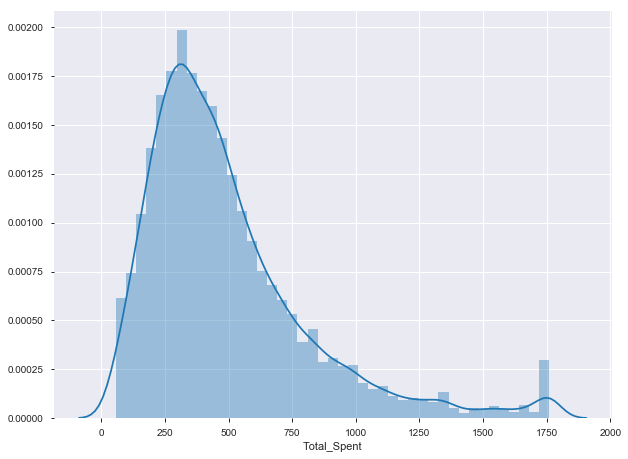

In [315]:
import seaborn as sns

sns.distplot(credit_final.Total_Spent)

In [316]:
credit_final["ln_Total_Spent"]= np.log(credit_final["Total_Spent"]+1)

C:\Users\hp\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


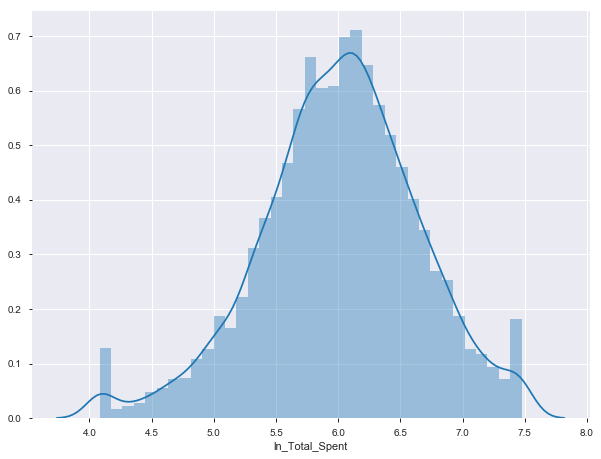

In [317]:
sns.distplot(credit_final.ln_Total_Spent)

In [318]:
credit_final=credit_final.drop(['Total_Spent'],axis=1)

In [319]:
feature_columns = credit_final.columns.difference( ['ln_Total_Spent'] )
feature_columns

Index([u'addresscat_2', u'addresscat_3', u'addresscat_4', u'addresscat_5',
       u'carcatvalue_1', u'carcatvalue_2', u'carcatvalue_3', u'card2items',
       u'card2spent', u'card_2', u'card_3', u'card_4', u'card_5', u'carditems',
       u'cardspent', u'carvalue', u'creddebt', u'ed', u'edcat_2', u'edcat_3',
       u'edcat_4', u'edcat_5', u'empcat_2', u'empcat_3', u'empcat_4',
       u'empcat_5', u'inccat_2', u'inccat_3', u'inccat_4', u'inccat_5',
       u'income', u'lncreddebt', u'lninc', u'lnothdebt', u'othdebt',
       u'owncd_1', u'owndvd_1', u'ownvcr_1', u'retire_1', u'tollten',
       u'wireten'],
      dtype='object')

In [320]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( credit_final[feature_columns],
                                                  credit_final['ln_Total_Spent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [321]:
import statsmodels.api as sm

In [322]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [323]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_Total_Spent   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     677.2
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        22:27:29   Log-Likelihood:                 371.03
No. Observations:                3500   AIC:                            -658.1
Df Residuals:                    3458   BIC:                            -399.3
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.1978      0.093     45.071

In [324]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print 'MAE:', metrics.mean_absolute_error(test_y, y_pred)
print 'MSE:', metrics.mean_squared_error(test_y, y_pred)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred))

MAE: 0.15717864799996217
MSE: 0.04406631703031898
RMSE: 0.20991978713384543


In [325]:
from sklearn.model_selection import train_test_split
train ,test = train_test_split(credit_final,test_size=0.3,random_state = 123 ) 

In [326]:
train.columns= [phrase.strip().replace('-', '') for phrase in train.columns]
train.columns

Index([u'card2items', u'card2spent', u'carditems', u'cardspent', u'carvalue',
       u'creddebt', u'ed', u'income', u'lncreddebt', u'lninc', u'lnothdebt',
       u'othdebt', u'tollten', u'wireten', u'edcat_2', u'edcat_3', u'edcat_4',
       u'edcat_5', u'empcat_2', u'empcat_3', u'empcat_4', u'empcat_5',
       u'retire_1', u'inccat_2', u'inccat_3', u'inccat_4', u'inccat_5',
       u'addresscat_2', u'addresscat_3', u'addresscat_4', u'addresscat_5',
       u'carcatvalue_1', u'carcatvalue_2', u'carcatvalue_3', u'card_2',
       u'card_3', u'card_4', u'card_5', u'ownvcr_1', u'owncd_1', u'owndvd_1',
       u'ln_Total_Spent'],
      dtype='object')

In [327]:
all_columns = "+".join(train.columns.difference( ['ln_Total_Spent'] ))

print all_columns

my_formula = "ln_Total_Spent~" + all_columns

print my_formula

addresscat_2+addresscat_3+addresscat_4+addresscat_5+carcatvalue_1+carcatvalue_2+carcatvalue_3+card2items+card2spent+card_2+card_3+card_4+card_5+carditems+cardspent+carvalue+creddebt+ed+edcat_2+edcat_3+edcat_4+edcat_5+empcat_2+empcat_3+empcat_4+empcat_5+inccat_2+inccat_3+inccat_4+inccat_5+income+lncreddebt+lninc+lnothdebt+othdebt+owncd_1+owndvd_1+ownvcr_1+retire_1+tollten+wireten
ln_Total_Spent~addresscat_2+addresscat_3+addresscat_4+addresscat_5+carcatvalue_1+carcatvalue_2+carcatvalue_3+card2items+card2spent+card_2+card_3+card_4+card_5+carditems+cardspent+carvalue+creddebt+ed+edcat_2+edcat_3+edcat_4+edcat_5+empcat_2+empcat_3+empcat_4+empcat_5+inccat_2+inccat_3+inccat_4+inccat_5+income+lncreddebt+lninc+lnothdebt+othdebt+owncd_1+owndvd_1+ownvcr_1+retire_1+tollten+wireten


In [328]:
import statsmodels.formula.api as smf

lm=smf.ols(formula=my_formula, data=train).fit()

In [329]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [441]:
%%capture
#gather features
#features = "+".join(car_sales.columns - ["Sales_in_thousands"])

# get y and X dataframes based on this regression
y, X = dmatrices('ln_Total_Spent~addresscat_4+carcatvalue_2+card2items+card_3+card_5+carditems+edcat_3+empcat_3+tollten',
                 credit_final, return_type='dataframe')

In [442]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [443]:
vif.sort_values(by='VIF Factor',ascending=False)

,VIF Factor,features
0,14.750286,Intercept
5,1.019158,card_5
4,1.017350,card_3
1,1.014173,addresscat_4
8,1.014115,empcat_3
2,1.012492,carcatvalue_2
6,1.012227,carditems
3,1.010362,card2items
9,1.005674,tollten
7,1.003092,edcat_3


In [446]:
vif.count()

VIF Factor    10
features      10
dtype: int64

In [444]:
lm1=smf.ols('ln_Total_Spent~addresscat_4+carcatvalue_2+card2items+card_3+carditems+edcat_3+empcat_3+tollten', credit_final).fit()

In [445]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ln_Total_Spent   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     626.8
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        22:40:28   Log-Likelihood:                -3145.5
No. Observations:                5000   AIC:                             6309.
Df Residuals:                    4991   BIC:                             6368.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.4942      0.025    183.038      0.000       4.446       4.542
addresscat_4      0.0741      0.015      4.809      0.000       0.044       0.104
carcatvalue_2     0.1078      0.015      7.251      0.000       0.079       0.137
card2items        0.1245      0.003     47.578      0.000       0.119       0.130
card_3           -0.1344      0.015     -8.922      0.000      -0.164      -0.105
carditems         0.0865      0.002     44.805      0.000       0.083       0.090
edcat_3           0.0454      0.016      2.849      0.004       0.014       0.077
empcat_3          0.0185      0.016      1.130      0.259      -0.014       0.051
tollten        5.005e-05   7.04e-06      7.106      0.000    3.62e-05    6.39e-05
==============================================================================
Omnibus:                      165.536   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.615
Skew:                           0.456   Prob(JB):                     3.66e-40
Kurtosis:                       3.197   Cond. No.                     4.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [447]:
y_pred = lm1.predict(test_X)

In [448]:
from sklearn import metrics
import numpy as np
print 'MAE:', metrics.mean_absolute_error(test_y, y_pred)
print 'MSE:', metrics.mean_squared_error(test_y, y_pred)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred))

MAE: 0.35551775927733575
MSE: 0.20019717065950288
RMSE: 0.44743398469439366


C:\Users\hp\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


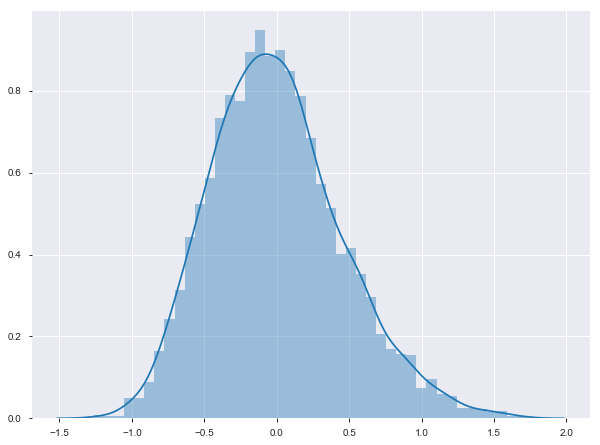

In [449]:
sns.distplot(lm1.resid)